### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

### Imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



Degree 1: MSE = 0.030535987662423037
Degree 2: MSE = 0.025748941862908
Degree 3: MSE = 0.01690668181141918
Degree 4: MSE = 0.013328196446657696
Degree 5: MSE = 0.011561695532681682


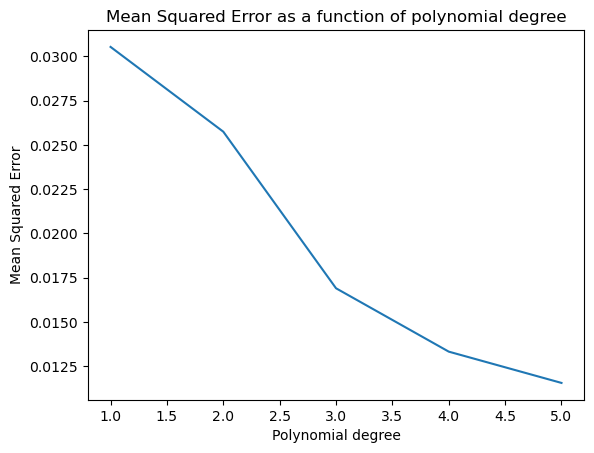

In [50]:
# Get the FrankeFunction. Using the function provided in the project description.


def mean_squared_error(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# Generate the data
np.random.seed(42)
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

# Potentially make this a function so that we can adjust the degree of the polynomial easily.
def prep_poly_feartures(x, y, degree):
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(np.vstack((x,y)).T)
  return X_poly

def poly_regression_and_mse(degree, X, y, Z):
  poly_features = prep_poly_feartures(X, y, degree)
  model = LinearRegression()
  model.fit(poly_features, Z)
  Z_pred = model.predict(poly_features)
  mse = mean_squared_error(Z, Z_pred)
  return mse
  
mse_results = {}
for degree in range(1,6):
  mse = poly_regression_and_mse(degree, x, y, Z)
  mse_results[degree] = mse
  print(f"Degree {degree}: MSE = {mse}")


plt.figure()
plt.plot(list(mse_results.keys()), list(mse_results.values()))
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error as a function of polynomial degree')
plt.show()
  

In [33]:
x = np.random.rand(100)
x


array([0.09355941, 0.01667155, 0.87353426, 0.23647491, 0.21150675,
       0.7360354 , 0.32001611, 0.50604469, 0.16251107, 0.95974572,
       0.8515814 , 0.86378962, 0.40677375, 0.76236121, 0.14387616,
       0.008619  , 0.01997293, 0.58660174, 0.45539491, 0.51801535,
       0.00746314, 0.42268662, 0.71806816, 0.4426937 , 0.73221921,
       0.23301896, 0.813142  , 0.58843124, 0.2107631 , 0.23672048,
       0.62803046, 0.82993959, 0.41562778, 0.25830043, 0.86701161,
       0.66926829, 0.44808549, 0.4879002 , 0.20425647, 0.62680263,
       0.35874251, 0.99564518, 0.48018352, 0.48588561, 0.56585179,
       0.916756  , 0.8008181 , 0.45113007, 0.71869927, 0.5862355 ,
       0.49236705, 0.19231577, 0.46393626, 0.24581859, 0.91484215,
       0.33540681, 0.95226401, 0.53305529, 0.63154438, 0.54294044,
       0.12938062, 0.37582122, 0.09914611, 0.62295404, 0.4468742 ,
       0.77798497, 0.22047048, 0.16456606, 0.40633223, 0.92658538,
       0.71042182, 0.41892362, 0.51727217, 0.08421301, 0.98457